<a href="https://colab.research.google.com/github/HokageAnonymous/Sentiment-Analysis/blob/main/Sentiment_Analysis_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


**Kaggle library setup**


---



In [1]:
#To use the API to execute data from Kaggle.
! pip install kaggle

Configuring The Path of kaggle.json file

In [2]:
# NOTE: The file should contain the API key from Kaggle account to make it work otherwise download the zip file amd uplaod manually.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 51% 41.0M/80.9M [00:00<00:00, 221MB/s]
100% 80.9M/80.9M [00:00<00:00, 312MB/s]


In [4]:
# extracting the file

from zipfile import ZipFile

dataset = '/content/sentiment140.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Done!!')

Done!!




---


📦 **Import Required Libraries**


---



In [5]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

🔧 Download Stopwords

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
# Printing the stopwords in english
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she



---



 📂 **Load the Dataset**


---







In [8]:
#loading the data from the csv file to pandas dataframe
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding = 'ISO-8859-1')



---


**ABOUT DATASET**

This is the sentiment140 dataset.
It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive) and they can be used to detect sentiment .
It contains the following 6 fields:

target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

ids: The id of the tweet ( 2087)

date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

flag: The query (lyx). If there is no query, then this value is NO_QUERY.

user: the user that tweeted (robotickilldozr)

text: the text of the tweet (Lyx is cool)

In [9]:
#checking the number of rows and column
twitter_data.shape

(1599999, 6)

In [10]:
# printing the first 5 rows of the dataframe
twitter_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [11]:
from tkinter.font import names
# Naming the columns and reading the dataset again

Column_names = ['target','id','date','flag','user','text']
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', names=Column_names, encoding = 'ISO-8859-1')

In [12]:
#checking number of columns *UPDATED*
twitter_data.shape

(1600000, 6)

In [13]:
# printing the first 5 rows of the dataframe *UPDATED*
twitter_data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [14]:
#checking for missing values in the dataset
twitter_data.isnull().sum()

,0
target,0
id,0
date,0
flag,0
user,0
text,0


In [15]:
#checking for distribution of target column
twitter_data['target'].value_counts()

,count
target,
0,800000
4,800000






---



Convert the Data "4" -> "1"

We know, The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive)

In [16]:
twitter_data.replace({'target':{4:1}}, inplace=True)

In [17]:
#checking for distribution of target column **UPDATED**
twitter_data['target'].value_counts()

,count
target,
0,800000
1,800000


NOW,




0 ----> *Negative *



1 ----> *Positive *



---


🧹 **Text Preprocessing with Stemming**



---



In [18]:
port_stem = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [19]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stop_words]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [20]:
twitter_data['stemmed_content'] = twitter_data['text'].apply(stemming) #45 min wait

In [21]:
twitter_data.head()

,target,id,date,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [22]:
print(twitter_data['stemmed_content'])

0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996    thewdb com cool hear old walt interview http b...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: stemmed_content, Length: 1600000, dtype: object


In [23]:
print(twitter_data['target'])

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64




---

🎯 **Feature & Label Separation**


---



In [24]:
#seperating the data and label (+ve or -ve)
X = twitter_data['stemmed_content'].values
Y = twitter_data['target'].values

In [25]:
print(X)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']


In [26]:
print(Y)

[0 0 0 ... 1 1 1]




---


📊 **Train-Test Split**


---



In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
# 20 percent of the data is test data and 80 percent of the data is train data. (total data here 1.6 million)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(1600000,) (1280000,) (320000,)


In [29]:
print(X_train)

['watch saw iv drink lil wine' 'hatermagazin'
 'even though favourit drink think vodka coke wipe mind time think im gonna find new drink'
 ... 'eager monday afternoon'
 'hope everyon mother great day wait hear guy store tomorrow'
 'love wake folger bad voic deeper']


In [30]:
print(X_test)

['mmangen fine much time chat twitter hubbi back summer amp tend domin free time'
 'ah may show w ruth kim amp geoffrey sanhueza'
 'ishatara mayb bay area thang dammit' ...
 'destini nevertheless hooray member wonder safe trip' 'feel well'
 'supersandro thank']




---


🔡  **TF-IDF Vectorization**


---



In [31]:
#converting the textual data to numerical data for representation

vectorizer = TfidfVectorizer(max_features=100000)

X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

In [32]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9030231 stored elements and shape (1280000, 100000)>
  Coords	Values
  (0, 94854)	0.27259876264838384
  (0, 76449)	0.3588091611460021
  (0, 40687)	0.5277679060576009
  (0, 23989)	0.3753708587402299
  (0, 50026)	0.41996827700291095
  (0, 96356)	0.4484755317023172
  (2, 23989)	0.4591176413728317
  (2, 27157)	0.1892155960801415
  (2, 88262)	0.18709338684973031
  (2, 28268)	0.29074192727957143
  (2, 88071)	0.32105459490875526
  (2, 94156)	0.3296595898028565
  (2, 16653)	0.31284080750346344
  (2, 96431)	0.3348599670252845
  (2, 56676)	0.24123230668976975
  (2, 88668)	0.15169282335109835
  (2, 39078)	0.1619010109445149
  (2, 33017)	0.18803850583207948
  (2, 28899)	0.2028971570399794
  (2, 62002)	0.16786949597862733
  (3, 88071)	0.29029991238662284
  (3, 34845)	0.4456939372299574
  (3, 33284)	0.278559647704793
  (3, 12049)	0.5200465453608686
  (3, 84259)	0.3940776331458846
  :	:
  (1279996, 50629)	0.2701039365628239
  (1279996, 685

In [33]:
print(X_test_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2238166 stored elements and shape (320000, 100000)>
  Coords	Values
  (0, 3067)	0.1719352837797837
  (0, 6444)	0.1624772418052177
  (0, 14480)	0.26800375270827315
  (0, 23283)	0.36555450010904555
  (0, 28909)	0.255254889555786
  (0, 30269)	0.23688292264071406
  (0, 37736)	0.2805816206356074
  (0, 57538)	0.45356623916588285
  (0, 59252)	0.17825180109103442
  (0, 84188)	0.2198507607206174
  (0, 86544)	0.34910438732642673
  (0, 88668)	0.3143047059807971
  (0, 91357)	0.17915624523539805
  (1, 1348)	0.30733520460524466
  (1, 3067)	0.211037449588008
  (1, 31922)	0.575262969264869
  (1, 46554)	0.40288153995289894
  (1, 54642)	0.28751585696559306
  (1, 75112)	0.4739279595416274
  (1, 79035)	0.24595562404108307
  (2, 4604)	0.3532582957477176
  (2, 7252)	0.37916255084357414
  (2, 19339)	0.36340369428387626
  (2, 40334)	0.5892069252021465
  (2, 54656)	0.2564939661498776
  :	:
  (319994, 88262)	0.22598535723625884
  (319994, 94967)	0.22



---

🤖 **Train Logistic Regression Model**



---



In [34]:
# training the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_features, Y_train)

LogisticRegression(max_iter=1000)



---


📈 **Evaluate Model Accuracy**


---



In [35]:
# Model Evaluation
# Accuracy score on training data
X_train_prediction = model.predict(X_train_features)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score on training data : ', training_data_accuracy)
# Accuracy score on test data
X_test_prediction = model.predict(X_test_features)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score on test data : ', test_data_accuracy)

Accuracy score on training data :  0.7900171875
Accuracy score on test data :  0.77628125





---



💾 **Save the Trained Model & Vectorizer**




---



In [36]:
#Saving the Trained Model
import pickle

In [37]:
filename = 'trainmodel.sav'
pickle.dump(model, open(filename, 'wb'))



---


🔍 **Predict Single Tweet Example**


---






Loading the Saved Model for Future Prediction.


In [38]:
loaded_model = pickle.load(open(filename, 'rb'))

In [39]:
#printing 150th datapoint
X_new = X_test[150]
print(Y_test[150])

# Transform the single sample using the vectorizer and reshape it
X_new_features = vectorizer.transform([X_new])

prediction = loaded_model.predict(X_new_features)
print(prediction)

if (prediction[0] == 0):
  print('The tweet is Negative😡')
else:
  print('The tweet is Positive😊')

0
[0]
The tweet is Negative😡


In [40]:
# Try it on a sample tweet
X_new = X_test[200]
print(Y_test[200])

X_new_features = vectorizer.transform([X_new])

prediction = loaded_model.predict(X_new_features)
print(prediction)

if (prediction[0] == 0):
  print('The tweet is Negative 😡')
else:
  print('The tweet is Positive😊')

1
[1]
The tweet is Positive😊




---

🔹 **Visualization**


---



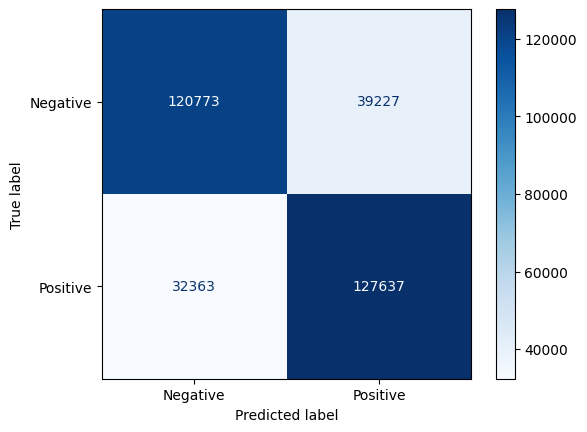

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test data
Y_test_pred = model.predict(X_test_features)

# Create confusion matrix
cm = confusion_matrix(Y_test, Y_test_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap='Blues')

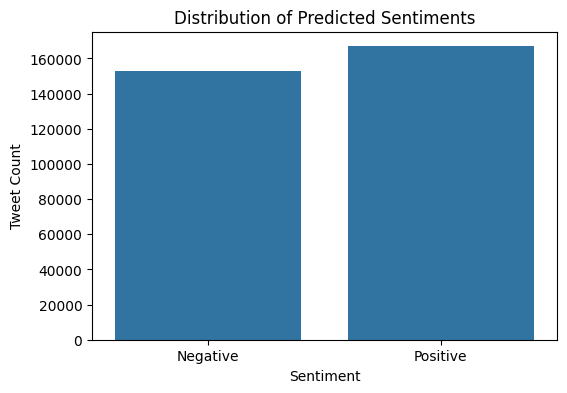

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count predictions
import numpy as np
unique, counts = np.unique(Y_test_pred, return_counts=True)

# Create bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=["Negative", "Positive"], y=counts)
plt.title("Distribution of Predicted Sentiments")
plt.ylabel("Tweet Count")
plt.xlabel("Sentiment")
plt.show()
